# A quick look at noise and signal in magnitude MRI images
# Benjamin M. Hardy 
# 7-19-2021
# benjamin.m.hardy (AT) vanderbilt (dot) edu
### Key References:
### 1. https://web.stanford.edu/class/rad229/Notes/Lecture-07/Rad229_2020_Lecture07A_SingleChannelSNR.pdf
### 2. https://onlinelibrary.wiley.com/doi/abs/10.1002/mrm.1910360327?sid=nlm%3Apubmed
### 3. https://aapm.onlinelibrary.wiley.com/doi/abs/10.1118/1.595711
### 4. Erratum for 3, https://aapm.onlinelibrary.wiley.com/doi/10.1118/1.595860

In [79]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Example 1: Make K-space Noise, Fourier Transform, show the statistics for varying signal. (from 1)


In [80]:
N = 256 # image/k-space size

mu, nsig = 0, 1 # noise sigma param, real and imaginary
kr = np.random.normal(mu, nsig, N*N) # generate gaussian noise
ki = np.random.normal(mu, nsig, N*N)
k = kr + 1j*ki # combine

im = N * np.fft.ifft(k) # ifft with scaling of N or sqrt(N*N)

# Calculate Noise as a function of SNR, with magnitude images

s = np.arange(0,10*nsig,.1) # since nsig = 1, SNR is truly just s + noise since SNR = S/Nsigma
mms = [np.mean(np.abs(im + sx)) for sx in s] # mean magnitude of signal
sdms = [np.std(np.abs(im + sx)) for sx in s] # standard deviation of magnitude signal
sl = np.ndarray.tolist(s)

# metrics in the plot in 1.
meanBias = mms-s
# Try correction factor, since < 4 SNR, the noise is Rayleigh distrubuted for the Magnitude images
#cmb = meanBias/np.sqrt(np.pi/2)
#csd = sdms/np.sqrt(2-np.pi/2)



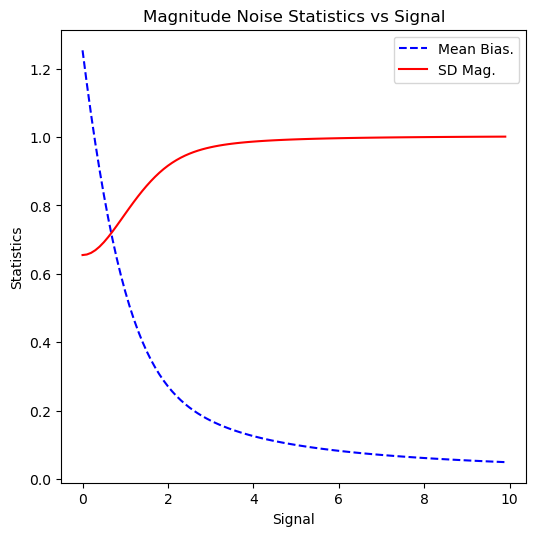

In [81]:
# PLOT
plt.figure(figsize=(6,6),dpi=100)
plt.plot(sl, meanBias,'b--',sl,sdms,'r-')
plt.ylabel('Statistics')
plt.xlabel('Signal')
plt.title('Magnitude Noise Statistics vs Signal')
plt.legend(['Mean Bias.','SD Mag.'])
plt.show()

## Essentially, a scan with SNR > 4 magnitude image can be approximated as gaussian noise, this is supported by [3]

# Recreate figure 2 and corrected figure 3 from [3]


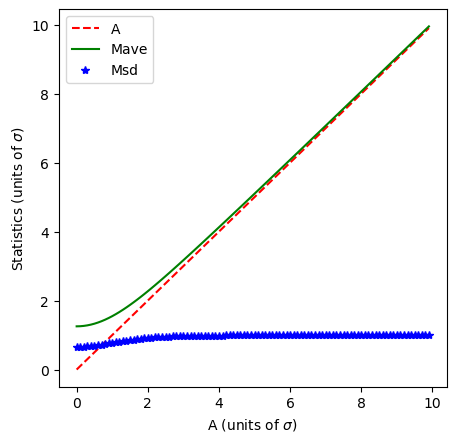

In [82]:
# Figure 2:
sigma = nsig
A = s/sigma
Mave = np.asarray(mms)/sigma
Msd = np.asarray(sdms)/sigma
plt.figure(figsize=(5,5),dpi=100)
plt.plot(A, A,'r--', A, Mave,'g-',A, Msd,'b*')
plt.xlabel('A (units of $\sigma$)')
plt.ylabel('Statistics (units of $\sigma$)')
plt.legend(['A','Mave','Msd'])
plt.show()

In [83]:
# Corrected Figure 3
bgMsd = np.std(np.abs(im))
bgMave = np.mean(np.abs(im))
# Verify sigma is 1, from equation (7), or rather the equation right after equation (6) in ref. [3]
sigma = np.sqrt((bgMsd**2 + bgMave**2)/2)
print(sigma)
# Correct!

0.9999878293491534


C:\Users\benja\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


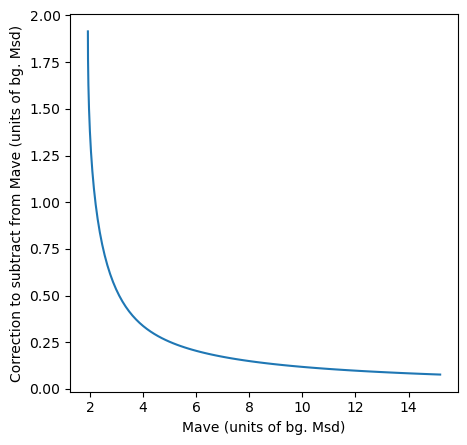

In [84]:
# Corrected Figure 3
Mave = np.asarray(mms) # units of bgMsd

# correction to subtract from measured signal, A can be obtained
# note: A when plotted should follow the correction
#measuredSignal = [(im + sx) for sx in s]
A = np.asarray([np.mean(im + sx) for sx in s])
correction = (Mave - A)/bgMsd

plt.figure(figsize=(5,5),dpi=100)
plt.plot(Mave/bgMsd, correction)
plt.ylabel('Correction to subtract from Mave (units of bg. Msd)')
plt.xlabel('Mave (units of bg. Msd)') 
plt.show()

C:\Users\benja\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


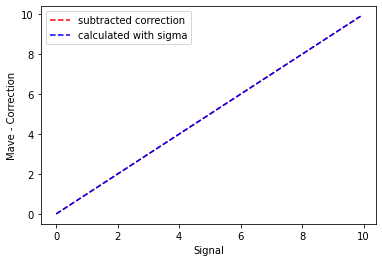

In [85]:
# verify that subtracting the correction gives A or the gaussian signal
Mave = np.asarray(mms)
Msd = np.asarray(sdms)
calcA = np.sqrt(Msd**2 + Mave**2 - 2*sigma**2) # just uses the known information and calculated sigma
Acorr = Mave - correction*bgMsd
plt.figure()
plt.plot(A,Acorr,'r--',A,calcA,'b--')
plt.xlabel('Signal')
plt.ylabel('Mave - Correction')
plt.legend(['subtracted correction','calculated with sigma'])
plt.show()

In [86]:
# Create a Function Corr(Mave(Msd)) or class
def magSNR(S,N):
    # inputs: S - array of complex signal from uniform region in image
    #         N - array of complex noise from uniform region of noise in image
    bgMsd = np.std(np.abs(N))
    bgMave = np.mean(np.abs(N))
    # from equation (7), or rather the equation right after equation (6) in ref. [3]
    sigma = np.sqrt((bgMsd**2 + bgMave**2)/2)
    # Signal regions:
    Msd = np.std(np.abs(S))
    Mave = np.mean(np.abs(S))
    calcA = np.sqrt(Msd**2 + Mave**2 - 2*sigma**2)
    return calcA/sigma

